In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 26})
plt.rcParams["figure.figsize"] = (15,10)

# Uncertainties

In [69]:
# Calculated in SkinDepth_voltageErrors
frequencies = [6500, 15000, 30000, 45000]
c_uncertainties = [0.049e-3, 0.068e-3, 0.131e-3, 0.174e-3]
a_uncertainties = [0.07034e-3, 0.11133e-3, 0.11996e-3, 0.15737e-3]
b_uncertainties = [0.08569e-3, 0.13563e-3, 0.23683e-3, 0.24426e-3]
s_uncertainties = [1.13712e-3, 1.66277e-3, 2.15046e-3, 2.70351e-3]

def linearFit(x, m, c):
    return m*x + c

def uncertainty(frequency, uncertaintyVals):
    errPars, errCov = curve_fit(linearFit, frequencies, uncertaintyVals)
    
    return (errPars[0] * frequency + errPars[1])

# Experiment

In [70]:
# Measured with a meter stick, unceratinty 0.5 mm
solenoidLength = 389 # mm

solenoidTurns = 856 # 11 per 5 mm => 856
cylinderTurns = 100
cylinderRadius = 9.6 /2 # mm

# Copper

In [123]:
cData01 = np.loadtxt("copperData220922.txt", skiprows=1)
copperFrequency = np.array(cData01[:,0])
copperVoltage = np.array(cData01[:,1])*10**-3

In [124]:
c_vOverF = list()

i = 0
while i<len(copperVoltage):
    c_vOverF.append(copperVoltage[i] / copperFrequency[i])
    i+=1

c_inverseF = [1/np.sqrt(el) for el in copperFrequency]

### Curvefit

In [125]:
# Errors
uCurrent = 0.1 *10**-3 # A
uTurns1 = 10 # NEEDS MEASURING
uTurns2 = 10 # NEEDS MEASURING
uLength = 0.05 *10**-3 # m

def makeErrors(freqData, uncertData):
    uncerts = list()
    
    for el in freqData:
        uncert = uncertainty(el, uncertData)
        
        if (uncert <= 0.01 *10**-3):
            uncerts.append(0.01 / el)
        else:
            uncerts.append(uncert / el)
            
            
    return uncerts

c_uVoltOverFreq = makeErrors(copperFrequency, c_uncertainties)
a_uVoltOverFreq = makeErrors(aluFrequency, a_uncertainties)
b_uVoltOverFreq = makeErrors(braFrequency, b_uncertainties)
s_uVoltOverFreq = makeErrors(steFrequency, s_uncertainties)

In [126]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

cop_pars, cop_cov = np.polyfit(c_inverseF[14:], c_vOverF[14:], 1, cov=True)

def cop_fitting(x):
    return cop_pars[0]*x + cop_pars[1]

print(f"Copper slope error: {np.sqrt(cop_cov[0][0])}")

Copper slope error: 1.0583473933640513e-06


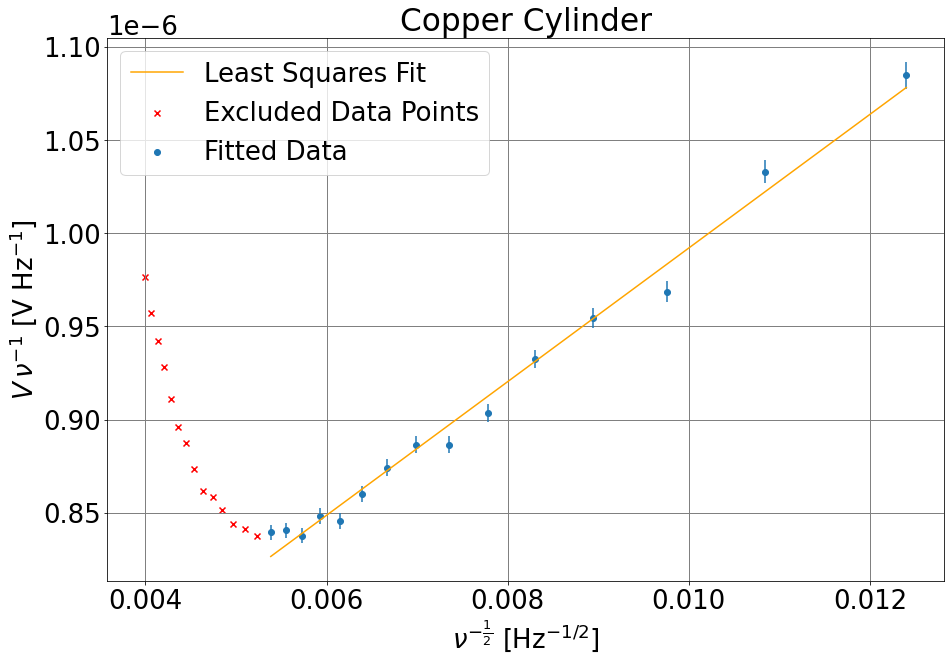

In [127]:
cop_xRange = np.linspace(c_inverseF[14], c_inverseF[-1], 100)

plt.scatter(c_inverseF[:14], c_vOverF[:14], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(c_inverseF[14:], c_vOverF[14:], label="Fitted Data") # Fitted points
plt.errorbar(c_inverseF[14:], c_vOverF[14:], c_uVoltOverFreq[14:], 0, fmt="none")
plt.plot(cop_xRange, cop_fitting(cop_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ [Hz$^{-1/2}$]")
plt.ylabel(r"$V\,\nu^{-1}$ [V Hz$^{-1}$]")
plt.title("Copper Cylinder")
plt.legend()

### Conductivity

In [76]:
def conductivity(m, relativeMu):
    N1= solenoidTurns
    N2= 100
    mu= 1.257e-6 * relativeMu # Adjusting for realtive permeabilty 
    I= 19e-3
    R= cylinderRadius * 10**-3
    L= solenoidLength * 10**-3
    
    return 8 * np.pi**3 * N1**2 * N2**2 * mu * I**2 * R**2 / (m**2 * L**2)

In [77]:
print(f"Conductivity of Copper: {conductivity(cop_pars[0], 1)}")

Conductivity of Copper: 123922797.4859298


# Aluminium

In [78]:
aData01 = np.loadtxt("aluminiumData200922.txt", skiprows=1)
aluFrequency = np.array(aData01[:,0])
aluVoltage = np.array(aData01[:,1])* 10**-3

In [79]:
a_vOverF = list()

i = 0
while i<len(aluVoltage):
    a_vOverF.append(aluVoltage[i] / aluFrequency[i])
    i+=1

a_inverseF = [1/np.sqrt(el) for el in aluFrequency]

### Curvefit

In [80]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

alu_pars, alu_cov = np.polyfit(a_inverseF[10:], a_vOverF[10:], 1, cov=True)

def alu_fitting(x):
    return alu_pars[0]*x + alu_pars[1]

print(f"Aluminium slope error: {np.sqrt(alu_cov[0][0])}")

Aluminium slope error: 1.2596424160258793e-06


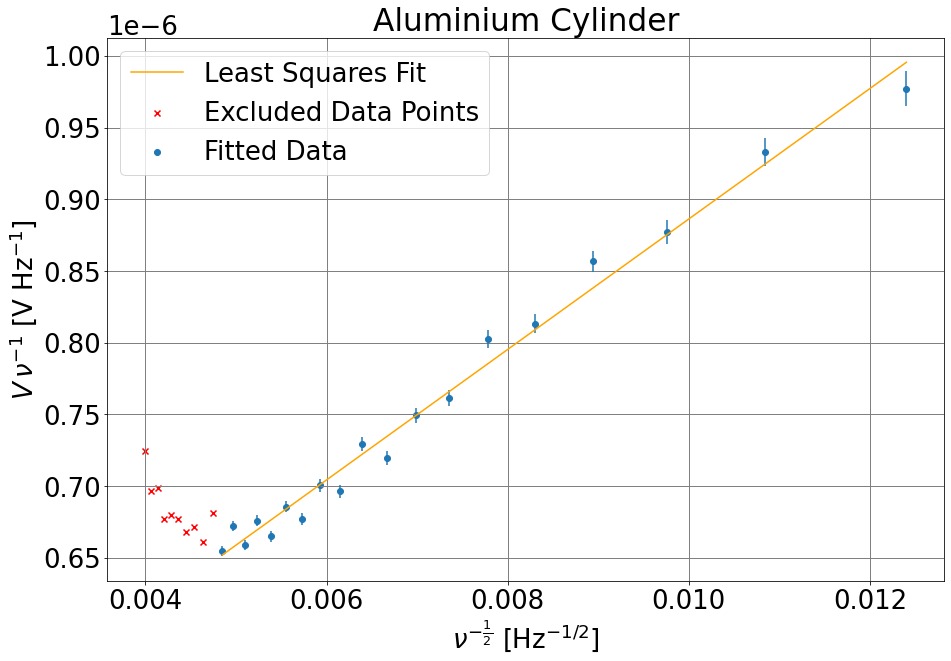

In [81]:
alu_xRange = np.linspace(a_inverseF[10], a_inverseF[-1], 100)

plt.scatter(a_inverseF[:10], a_vOverF[:10], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(a_inverseF[10:], a_vOverF[10:], label="Fitted Data") # Fitted points
plt.errorbar(a_inverseF[10:], a_vOverF[10:], a_uVoltOverFreq[10:], 0, fmt="none")
plt.plot(alu_xRange, alu_fitting(alu_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ [Hz$^{-1/2}$]")
plt.ylabel(r"$V\,\nu^{-1}$ [V Hz$^{-1}$]")
plt.title("Aluminium Cylinder")
plt.legend()

In [82]:
print(alu_pars[0])
print(f"Conductivity of Aluminium: {conductivity(alu_pars[0], 1)}")

4.549736661479407e-05
Conductivity of Aluminium: 60665302.18423552


# Brass

In [83]:
bData01 = np.loadtxt("brassData200922.txt", skiprows=1)
braFrequency = np.array(bData01[:,0])
braVoltage = np.array(bData01[:,1])* 10**-3

In [84]:
b_vOverF = list()

i = 0
while i<len(braVoltage):
    b_vOverF.append(braVoltage[i] / braFrequency[i])
    i+=1

b_inverseF = [1/np.sqrt(el) for el in braFrequency]

### Curvefit

In [85]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

bra_pars, bra_cov = np.polyfit(b_inverseF[14:], b_vOverF[14:], 1, cov=True)

def bra_fitting(x):
    return bra_pars[0]*x + bra_pars[1]

print(f"Brass slope error: {np.sqrt(bra_cov[0][0])}")

Brass slope error: 1.7755046623878676e-06


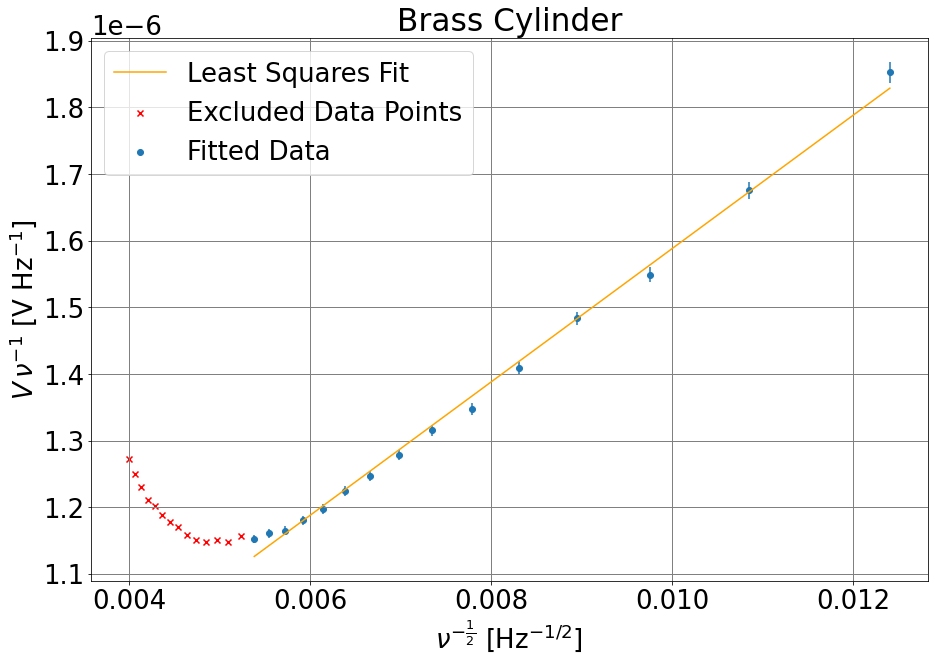

In [86]:
bra_xRange = np.linspace(b_inverseF[14], b_inverseF[-1], 100)

plt.scatter(b_inverseF[:14], b_vOverF[:14], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(b_inverseF[14:], b_vOverF[14:], label="Fitted Data") # Fitted points
plt.errorbar(b_inverseF[14:], b_vOverF[14:], b_uVoltOverFreq[14:], 0, fmt="none")
plt.plot(bra_xRange, bra_fitting(bra_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ [Hz$^{-1/2}$]")
plt.ylabel(r"$V\,\nu^{-1}$ [V Hz$^{-1}$]")
plt.title("Brass Cylinder")
plt.legend()

In [87]:
print(bra_pars[0])
print(f"Conductivity of Brass: {conductivity(bra_pars[0], 1)}")

0.00010010444813551764
Conductivity of Brass: 12531588.76241263


# Steel

In [88]:
sData01 = np.loadtxt("steelData210922.txt", skiprows=1)
steFrequency = np.array(sData01[:,0])
steVoltage = np.array(sData01[:,1])* 10**-3

In [89]:
s_vOverF = list()

i = 0
while i<len(steVoltage):
    s_vOverF.append(steVoltage[i] / steFrequency[i])
    i+=1

s_inverseF = [1/np.sqrt(el) for el in steFrequency]

### Curvefit

In [90]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

ste_pars, ste_cov = np.polyfit(s_inverseF[5:], s_vOverF[5:], 1, cov=True)

def ste_fitting(x):
    return ste_pars[0]*x + ste_pars[1]

print(f"Copper slope error: {np.sqrt(ste_cov[0][0])}")

Copper slope error: 6.838088400035773e-05


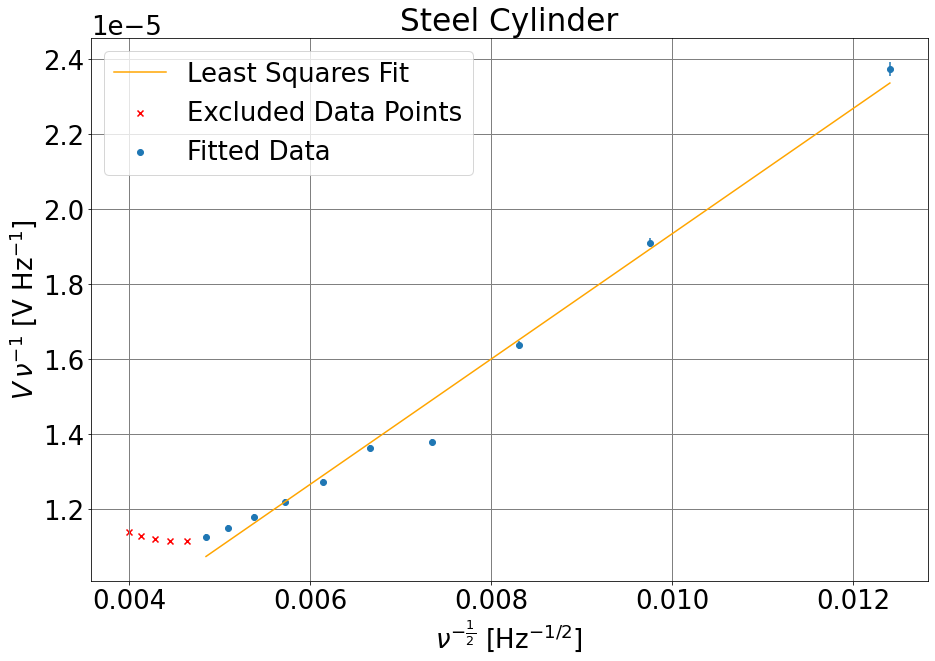

In [91]:
ste_xRange = np.linspace(s_inverseF[5], s_inverseF[-1], 100)

plt.scatter(s_inverseF[:5], s_vOverF[:5], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(s_inverseF[5:], s_vOverF[5:], label="Fitted Data") # Fitted points
plt.errorbar(s_inverseF[5:], s_vOverF[5:], s_uVoltOverFreq[5:], 0, fmt="none")
plt.plot(ste_xRange, ste_fitting(ste_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ [Hz$^{-1/2}$]")
plt.ylabel(r"$V\,\nu^{-1}$ [V Hz$^{-1}$]")
plt.title("Steel Cylinder")
plt.legend()

In [92]:
print(f"Conductivity of Steel: {conductivity(ste_pars[0], 100)}")

Conductivity of Steel: 4499679.027739578


# Values for Error Propagation Calculations

In [93]:
print(f"Copper Slope {cop_pars[0]}")
print(f"Aluminium Slope {alu_pars[0]}")
print(f"Brass Slope {bra_pars[0]}")
print(f"Steel Slope {ste_pars[0]}")

Copper Slope 3.1833239642072325e-05
Aluminium Slope 4.549736661479407e-05
Brass Slope 0.00010010444813551764
Steel Slope 0.0016705738355486117


# Skin Depth Calcuations from actual conductivity

In [94]:
actual_cConductivity = 58.7e6
actual_aConductivity = 36.9e6
actual_bConductivity = 15.9e6
actual_sConductivity = 10.1e6

In [128]:
def skinDepth(conductivity, frequency, mu=1.257e-6):
    return np.sqrt(1 / (mu * np.pi * conductivity * frequency))

In [129]:
# Skin depth for copper at varying frequencies
print(f"1 kHz: {skinDepth(actual_cConductivity,  1*10e3) * 10**3} mm")
print(f"10 kHz: {skinDepth(actual_cConductivity, 10*10e3) * 10**3} mm")
print(f"20 kHz: {skinDepth(actual_cConductivity, 20*10e3) * 10**3} mm")
print(f"30 kHz: {skinDepth(actual_cConductivity, 30*10e3) * 10**3} mm")
print(f"40 kHz: {skinDepth(actual_cConductivity, 40*10e3) * 10**3} mm")
print(f"50 kHz: {skinDepth(actual_cConductivity, 50*10e3) * 10**3} mm")
print(f"60 kHz: {skinDepth(actual_cConductivity, 60*10e3) * 10**3} mm")

1 kHz: 0.6568079096878531 mm
10 kHz: 0.20770089798277883 mm
20 kHz: 0.14686671342215823 mm
30 kHz: 0.11991616936128437 mm
40 kHz: 0.10385044899138941 mm
50 kHz: 0.09288666537544849 mm
60 kHz: 0.08479353652927868 mm


# How Skin Depth Varies based on material

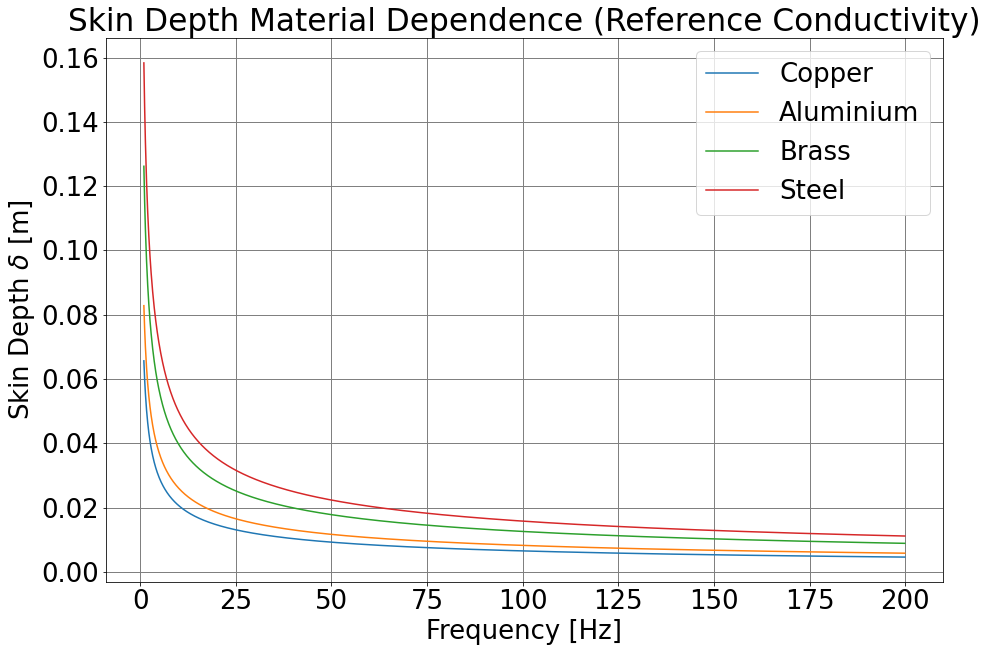

In [130]:
frequencyRange = np.arange(1, 200, 0.1)

plt.plot(frequencyRange, skinDepth(actual_cConductivity, frequencyRange), label = "Copper")
plt.plot(frequencyRange, skinDepth(actual_aConductivity, frequencyRange), label = "Aluminium")
plt.plot(frequencyRange, skinDepth(actual_bConductivity, frequencyRange), label = "Brass")
plt.plot(frequencyRange, skinDepth(actual_sConductivity, frequencyRange), label = "Steel")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"Frequency [Hz]")
plt.ylabel(r"Skin Depth $\delta$ [m]")
plt.title("Skin Depth Material Dependence (Reference Conductivity)")
plt.legend()

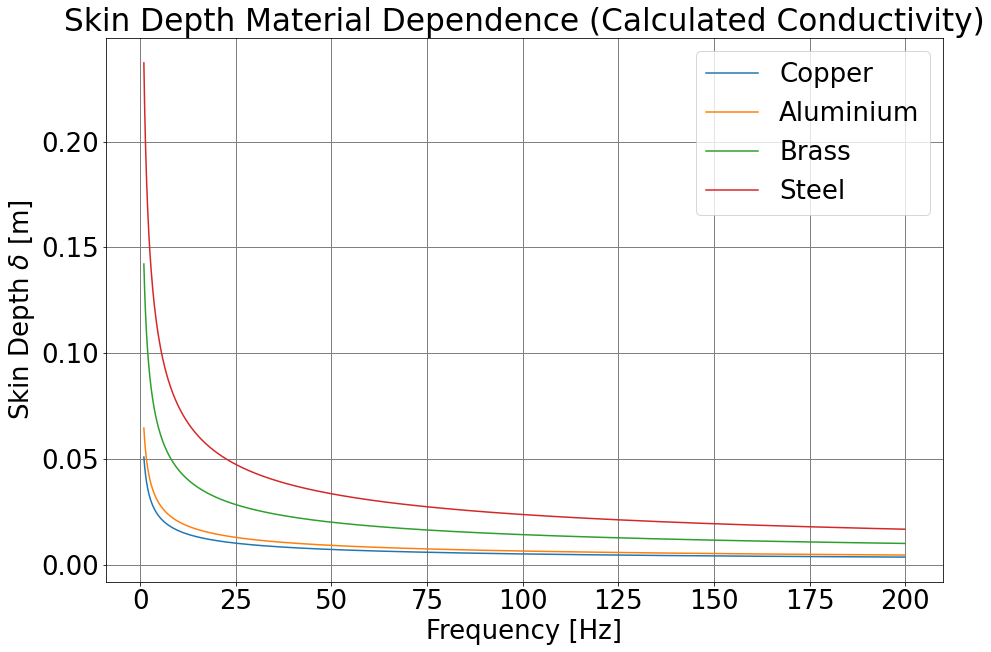

In [131]:
frequencyRange1 = np.arange(1, 200, 0.1)

plt.plot(frequencyRange1, skinDepth(conductivity(cop_pars[0], 1), frequencyRange), label = "Copper")
plt.plot(frequencyRange1, skinDepth(conductivity(alu_pars[0], 1), frequencyRange), label = "Aluminium")
plt.plot(frequencyRange1, skinDepth(conductivity(bra_pars[0], 1), frequencyRange), label = "Brass")
plt.plot(frequencyRange1, skinDepth(conductivity(ste_pars[0], 100), frequencyRange), label = "Steel")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"Frequency [Hz]")
plt.ylabel(r"Skin Depth $\delta$ [m]")
plt.title("Skin Depth Material Dependence (Calculated Conductivity)")
plt.legend()